# Lab 1: Linear Regression

In this practice session, you are invited to train a linear regression model using gradient descent method. After the learning phase, your model should predict house prices in the region of _Ile-de-France_ given their areas (in m²) and their numbers of rooms.

We will also enhace the perfomence of the learning algorithm using different implementation techniques like vectorization and features normalization.

## Import libraries and load data
Import **numpy** library that support matrix operation and **matplotlib** library for plotting data.  

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

The _house.csv_ file contains $d=3$ columns that represent the area, the number of rooms and the price of $n=600$ houses (one per row). 

- Open this file with a file editor to understand more the data. 
- Load the data and check its size.

**Hint:** You could use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library.

In [5]:
house_data = np.loadtxt('house.csv') 
print(house_data.shape)

(600, 3)


## Question 2
* Extract the house area and price columns respectively in $X$ and $y$ lists.
* Scatter prices against areas.

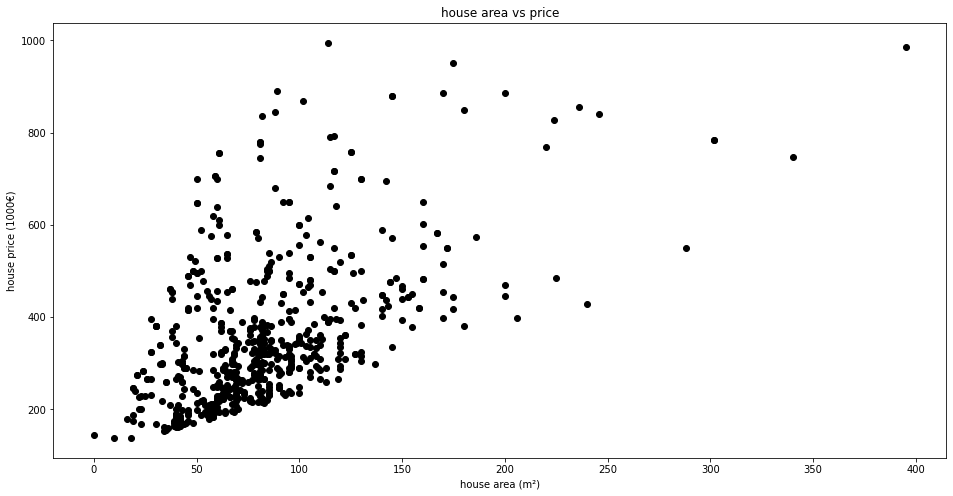

In [6]:
X = house_data[:,0]
y = house_data[:,2]

plt.figure("Visualize house data",figsize=(16,8))
plt.scatter(X, y,  color='black')
plt.xlabel('house area (m²)')
plt.ylabel('house price (1000€)')
plt.title('house area vs price')
plt.show()

## Question 3
The cost function we will use for this linear model training is the **Mean Squared Error** function defined by $$L(w) = MSE(X \cdot w, y) = \frac{1}{2n} \sum_{i=1}^{n}{( x_i \cdot w - y_i)^2}$$
First of all, transform $X$ and $y$ to be two $(n,1)$-numpy arrays.

In [7]:
X, y = np.array(X).reshape(-1, 1), np.array(y).reshape(-1, 1)  

## Question 4
Implement the mean squared error cost function. Then implement its gradient : $$\nabla L(w) = \partial_{w} MSE(X \cdot w, y) = \frac{1}{n} \sum_{i=1}^{n}{(x_i \cdot w - y_i)~x_i}$$

In [8]:
def MSE(y_true, y_pred):
    return .5*np.mean((y_pred - y_true)**2)

def dMSE(XX, y_true, y_pred):
    return np.dot(XX.T, y_pred-y_true)/XX.shape[0]

cost_func = (lambda w : MSE(y, np.dot(X,w)))
grad_cost_func = (lambda w : dMSE(X, y, np.dot(X,w)))

**Note :** Check [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). 

## Question 5
The update equation of the gradient descent algorithm is given by: $$w^{(t+1)}=w^{(t)}-\alpha \nabla L(w^{(t)}) $$
Where $\alpha$ represents the step or the **learning rate**.
* Compute three steps of the gradient descent with different values of $\alpha$.
 * Hint : To select the best value of $\alpha$, we could start by small values and increase it progressively. We should select the highest value of $\alpha$ before the algorithm diverge. The rule of thumbs for varying $\alpha$ is to increase it by factor of 3. For example, we could select $\alpha=0.0001,~0.0003,~0.001,~0.003,~0.01,~0,03,~0.1 \dots$
* For each $\alpha$, plot $w \to L(w)$, your initial point $(w_0, L(w_0))$ and the three points associated to $w_1$, $w_2$ and $w_3$ you've just computed. 
* What is the best $\alpha$ according to you ?

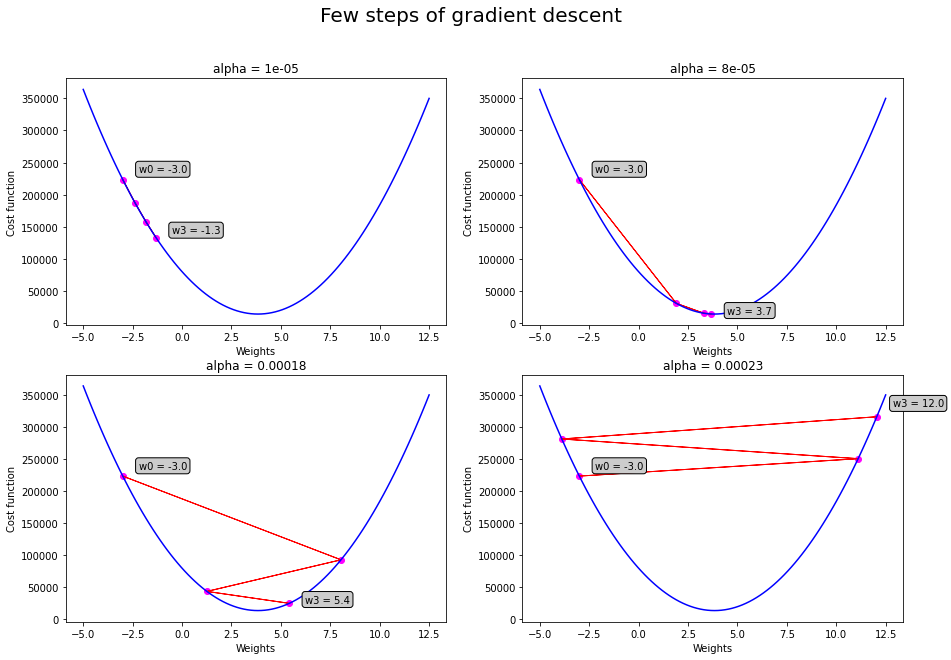

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Few steps of gradient descent', fontsize=20)
bbox = dict(boxstyle="round", fc="0.8")

Weights = np.linspace(-5,12.5,100)
Loss = [cost_func(w) for w in Weights]

for ax, alpha in zip(axs.reshape(4), (0.00001, 0.00008, 0.00018, 0.00023)):
    w0 = np.array([[-3]]) # Why ?
    cost_init = cost_func(w0)
    step = 0
    
    ax.plot(Weights, Loss,  color='blue')
    ax.scatter(w0, cost_init, color="magenta")
    ax.annotate("w%i = %.1f"%(step, w0), (w0, cost_init), xytext=(w0+0.8, 1.051*cost_init), bbox=bbox)

    while step < 3:
        grad = grad_cost_func(w0)
        w1 = w0 - alpha * grad 
        new_cost = cost_func(w1)

        # plot cost function, w0 point and the gradient direction
        ax.scatter(w1, new_cost, color="magenta")
        ax.arrow(w0[0,0], cost_init, (w1-w0)[0,0], new_cost-cost_init, color='red') # Why [0,0] ?
        
        # update for next step
        step += 1
        w0 = w1
        cost_init = cost_func(w0)
        
    ax.annotate("w%i = %.1f"%(step, w0), (w0, cost_init), xytext=(w0+0.8, 1.051*cost_init), bbox=bbox)
    ax.set_xlabel('Weights')
    ax.set_ylabel('Cost function')
    ax.set_title('alpha = {}'.format(alpha))

## Question 6

Implement the gradient descent algorithm, taking as input the gradient function, the learning rate, one or several stopping criterions and an initial parameter $w_0$.

In [10]:
def grad_descent(grad, w0, alpha=0.00008, max_iter=None, tol=1e-3):
    step = 0
    err = tol+1
    
    # Transform w0 to the right dimension
    w0 = np.array(w0)
    if w0.ndim == 1:
        w0 = w0.reshape(-1, 1)
    elif w0.ndim == 0:
        w0 = w0.reshape(1, 1)
        
    if max_iter is None:
        max_iter = np.inf

    # Updating loop until convergence
    while step < max_iter and err > tol:
        w1 = w0 - alpha * grad(w0)
        step += 1
        err = np.sqrt(((w1-w0)**2).sum())
        w0 = w1

    print('Converged in {} steps with precision {}'.format(step, err))
    print("The optimal parameter is: ", w1.T[0])

    return w1.T[0]

## Question 7
Compute the optimal parameter $w^*$. Compare on the same frame the actual prices and the ones predicted by the linear model against the areas.

Converged in 8 steps with precision 0.0007046527048721885
The optimal parameter is:  [3.83879132]
Final error =  28632.128657718207


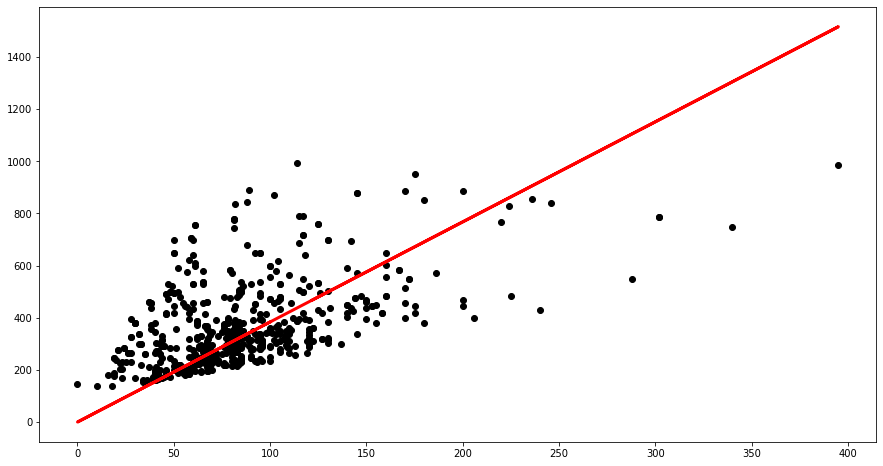

In [11]:
w_star = grad_descent(grad_cost_func, w0=-3)
print("Final error = ", cost_func(w_star))

y_hat = np.dot(X, w_star)

# plot linear model and data 
plt.figure('Regression Model', figsize=(15,8))
plt.scatter(X, y,  color='black')
plt.plot(X, y_hat, color='red', linewidth=3)
plt.show()

## Question 8
Introduce the bias term.

In [12]:
def add_bias(XX):
    n = XX.shape[0]
    return np.concatenate([np.ones((n,1)), XX], axis=1)

X = add_bias(X)
print(X)

[[  1. 122.]
 [  1. 125.]
 [  1.  79.]
 ...
 [  1.  86.]
 [  1.  64.]
 [  1. 100.]]


## Question 9
Same as question 7. Be careful to what should happend to $w_0$ and $\alpha$. 

Converged in 71330 steps with precision 0.00099999940208179
The optimal parameter is:  [142.52835988   2.50979211]
Final error =  19429.40262164086


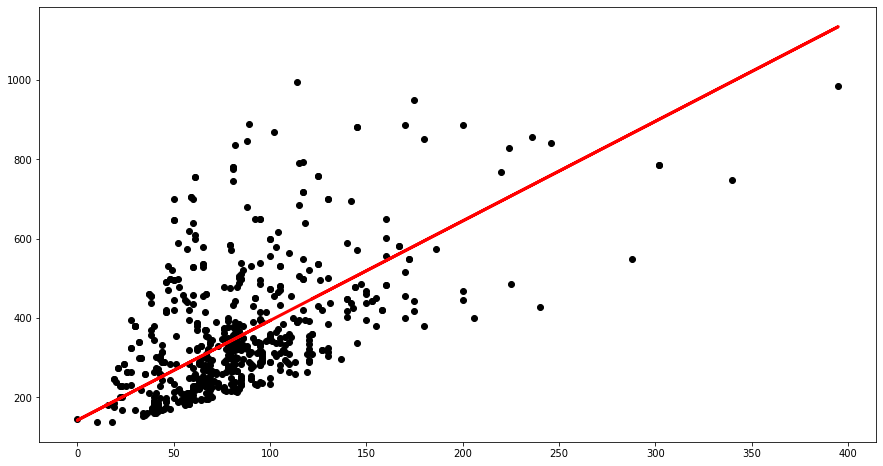

In [13]:
w_star = grad_descent(lambda w : dMSE(X, y, np.dot(X, w)), w0=[0,0])
y_hat = np.dot(X, w_star)

print("Final error = ", MSE(y, y_hat))

plt.figure('Regression Model', figsize=(15,8))
plt.scatter(X[:,1], y,  color='black')
plt.plot(X[:,1], y_hat, color='red', linewidth=3)
plt.show()

## Question 10
Add the number of rooms in $X$ and normalize it. Same as question 9. Comment.

Converged in 80675 steps with precision 0.0009999910919841048
The optimal parameter is:  [141.43295449   2.38952049   3.02168776]
Final error =  19322.03458790864


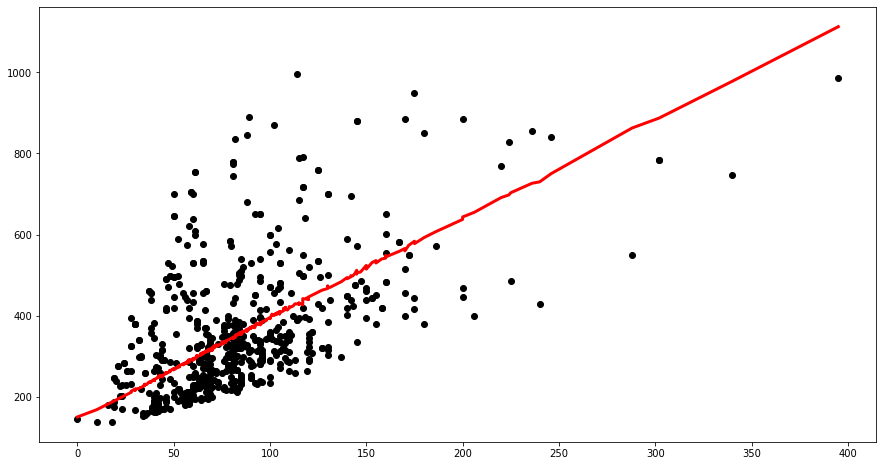

In [14]:
rooms = house_data[:,1,np.newaxis]
X = np.concatenate([X, rooms], axis=1)

w_star = grad_descent(lambda w : dMSE(X, y, np.dot(X, w)), w0=[0,0,0])
y_hat = np.dot(X, w_star)
print("Final error = ", MSE(y, y_hat))

areas_sorted = np.sort(X[:,1])
y_hat_sorted = y_hat[np.argsort(X[:,1])]

plt.figure('Regression Model', figsize=(15,8))
plt.scatter(X[:,1], y,  color='black')
plt.plot(areas_sorted, y_hat_sorted, color='red', linewidth=3)
plt.show()

## Question 11
You could also try to add other feature columns to the matrix X like $area^2$ or $area^{0.5}\dots~$ and see the effect on the model and the error. Is it still linear ?

Converged in 16642 steps with precision 0.000999986658241386
The optimal parameter is:  [ 10.34145013   0.47452015 -13.60024974  41.22129033]
Final error =  17475.59474853128


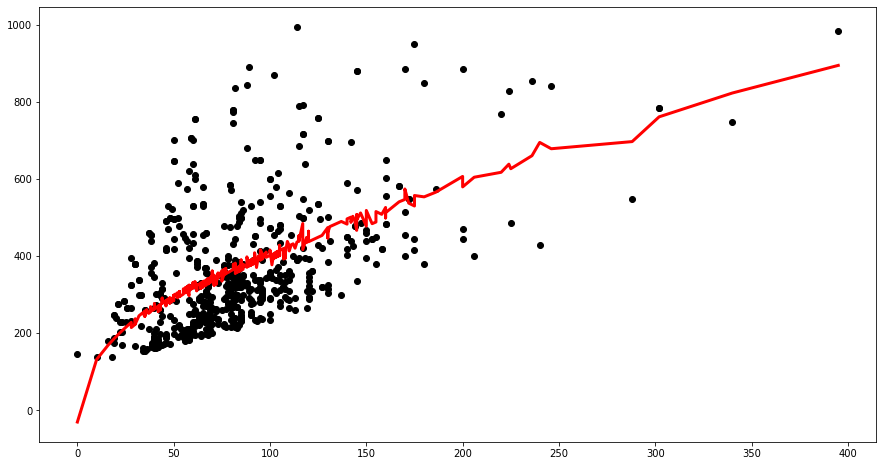

In [15]:
sqrt_areas = np.sqrt(house_data[:,0, np.newaxis])
X = np.concatenate([X, sqrt_areas], axis=1)

w_star = grad_descent(lambda w : dMSE(X, y, np.dot(X,w)), w0=[0,0,0,0])
y_hat = np.dot(X, w_star)
print("Final error = ", MSE(y, y_hat))

y_hat_sorted = y_hat[np.argsort(X[:,1])]

# plot linear model and data 
plt.figure('Regression Model', figsize=(15,8))
plt.scatter(X[:,1], y, color='black')
plt.plot(areas_sorted, y_hat_sorted, color='red', linewidth=3)
plt.show()

## Question 12

Compute the coefficient of determination $R^2$ and plot it against the size of the sample. What do you observe ?

## Question 13

Create a LinearRegression class object.

In [16]:
class LinearRegression:
    """
    Trains a linear regression model, X begin a list of lists of features, y being a list of values to predict.
    """
    def __init__(self, alpha=1.0, tol=1e-3, max_iter=None):
        """
        Initalizes the hyper parameters of the model
        alpha : Regularization strength; must be a positive float.
        max_iter : Number of steps of gradient descent.
        normalize : Whether to normalize features or not.
        solver : Gradient descent or Stochastic gradient descent
        """
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, XX, yy):
        """
        Fit the linear model
        X : {ndarray, sparse matrix} of shape (n_samples, n_features)
        y : ndarray of shape (n_samples,) or (n_samples, n_targets)
        """
        XX, yy = np.array(XX), np.array(yy)
        if XX.ndim == 1:
            XX = XX.reshape(-1, 1).T # In what special case we need that ? Why is it bad to have to do this here ?
        if yy.ndim == 1:
            yy = yy.reshape(-1, 1)
        n, d = XX.shape
        
        XX = add_bias(XX)
            
        self.coef_ = grad_descent(lambda w : dMSE(XX, yy, np.dot(XX,w)),
                                  w0=[0]*(d+1),
                                  alpha=self.alpha,
                                  tol=self.tol,
                                  max_iter=self.max_iter)
        
        return self
    
    def predict(self, XX):
        """
        Predict using the linear model
        X : array_like or sparse matrix, shape (n_samples, n_features)
        """
        XX = np.array(XX)        
        if XX.ndim == 1:
            XX = XX.reshape(-1, 1).T # Why do we need that ?
    
        XX = add_bias(XX)
        return np.dot(XX,self.coef_)

## Question 14
Compare your results with $\verb!sklearn!$'s [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

## Question 15

How much would cost a $330m^2$ flat with $5$ rooms ?

In [17]:
X = np.concatenate([house_data[:,0:2], sqrt_areas], axis=1)

LG = LinearRegression(alpha=0.00008)
LG.fit(X,y)

x_test = [330, 5, np.sqrt(330)]
y_test = LG.predict(x_test)
print("A 330m2 flat with 5 rooms would cost %7.0f euros"%(y_test[0]*1e3))

Converged in 16642 steps with precision 0.000999986658241386
The optimal parameter is:  [ 10.34145013   0.47452015 -13.60024974  41.22129033]
A 330m2 flat with 5 rooms would cost  847754 euros
